In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [2]:
import bz2
import os
import ujson
import attr
import math

import pandas as pd
import numpy as np

from glob import glob
from tqdm import tqdm_notebook
from itertools import islice
from collections import OrderedDict, defaultdict
from pyemd import emd

from sklearn.cluster import AgglomerativeClustering
from scipy import stats

In [3]:
@attr.s
class Dataset:
    
    root = attr.ib()
    
    def paths(self):
        return glob(os.path.join(self.root, '*.bz2'))
    
    def novels(self):
        for path in tqdm_notebook(self.paths()):
            with bz2.open(path) as fh:
                for line in fh:
                    yield ujson.loads(line)

In [4]:
fic = Dataset('../../data/hathi-fic-50bins.json/')
non = Dataset('../../data/hathi-non-50bins.json/')

In [5]:
fic_novels = list(fic.novels())
non_novels = list(non.novels())

HBox(children=(IntProgress(value=0, max=50), HTML(value='')))

HBox(children=(IntProgress(value=0, max=50), HTML(value='')))

In [26]:
def compare(token):

    fic_c = [np.array(novel['counts'][token]) for novel in fic_novels]
    fic_c = np.stack([s for s in fic_c if s.sum() > 100]).sum(0)

    non_c = [np.array(novel['counts'][token]) for novel in non_novels]
    non_c = np.stack([s for s in non_c if s.sum() > 100]).sum(0)

    plt.figure(figsize=(8,6))
    plt.plot(fic_c / fic_c.sum(), label='Fiction')
    plt.plot(non_c / non_c.sum(), label='Nonfiction')
    plt.legend()

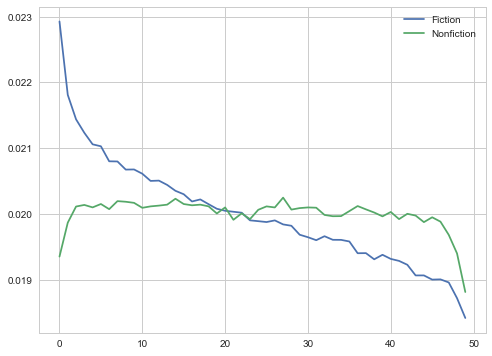

In [27]:
compare('a')

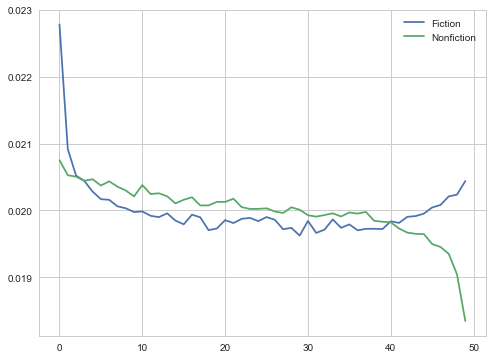

In [28]:
compare('the')